<a href="https://colab.research.google.com/github/Kasuni5626/Traffic-Sign-Recognition/blob/main/Traffic_sign_recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
DATA_DIR = "/content/drive/MyDrive/GTSRB_dataset"

In [ ]:
IMG_SIZE = 64
BATCH_SIZE = 32
SEED = 123

train_val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 8545 files belonging to 42 classes.
Using 6836 files for training.
Found 8545 files belonging to 42 classes.
Using 1709 files for validation.


In [ ]:
val_size = int(0.2 * len(train_val_ds))
train_size = len(train_val_ds) - val_size

train_ds = train_val_ds.take(train_size)
val_ds = train_val_ds.skip(train_size)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
data_augmentation = models.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1, 0.1)
])

In [ ]:
NUM_CLASSES = len(train_val_ds.class_names)

model = models.Sequential([

    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 1196s 7s/step - accuracy: 0.0634 - loss: 3.5593 - val_accuracy: 0.2140 - val_loss: 2.6575
Epoch 2/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 77s 447ms/step - accuracy: 0.2051 - loss: 2.7456 - val_accuracy: 0.4384 - val_loss: 1.8401
Epoch 3/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 78s 454ms/step - accuracy: 0.3186 - loss: 2.1946 - val_accuracy: 0.5541 - val_loss: 1.4397
Epoch 4/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 78s 452ms/step - accuracy: 0.4445 - loss: 1.7859 - val_accuracy: 0.7252 - val_loss: 0.9694
Epoch 5/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 97s 566ms/step - accuracy: 0.5285 - loss: 1.5091 - val_accuracy: 0.7695 - val_loss: 0.8203
Epoch 6/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 77s 448ms/step - accuracy: 0.5994 - loss: 1.2778 - val_accuracy: 0.8056 - val_loss: 0.5907
Epoch 7/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 77s 451ms/step - accuracy: 0.6520 - loss: 1.1023 - val_accuracy: 0.8746 - val_loss: 0.4624
Epoch 8/30
172/172 ━━━━━━━━━━━━━━━━━━━━ 97s 565ms/step - accuracy: 0.6934 - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print("Test Accuracy:", test_acc)

54/54 ━━━━━━━━━━━━━━━━━━━━ 359s 7s/step - accuracy: 0.9924 - loss: 0.0286
Test Accuracy: 0.9894675016403198


In [ ]:
model.save("/content/drive/MyDrive/TrafficSignProject/traffic_sign_model.h5")
print("Model (H5) saved!")

Model (H5) saved!


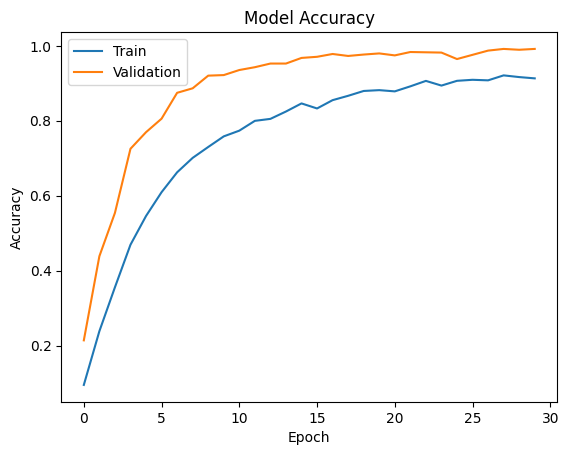

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

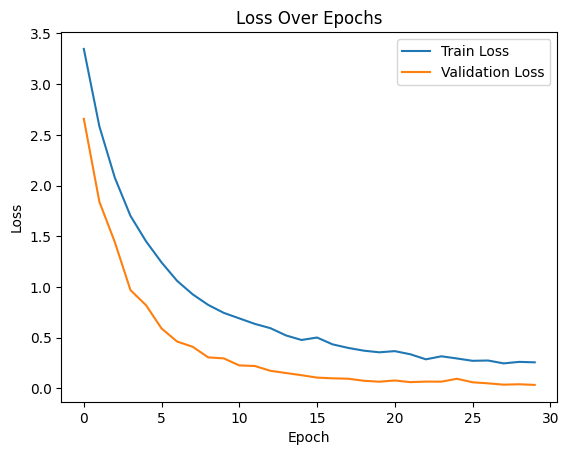

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()

In [ ]:
print(train_val_ds.class_names)
print(NUM_CLASSES)

['Children Crossing  School Zone', 'Crossroad  Junction Ahead', 'Cyclists Crossing  Bicycle Crossing Ahead', 'Double Bend  Winding Road Ahead', 'End of All Restrictions', 'End of No Overtaking', 'End of Speed Limit', 'General Danger  Warning', 'Give Way  Yield', 'Go Straight  Straight Ahead Only', 'Keep Left', 'No Entry', 'No Overtaking', 'No Overtaking  No Passing', 'No Trucks  No Heavy Goods Vehicles', 'No Vehicles  All Vehicles Prohibited', 'Pedestrian Crossing Ahead', 'Priority Road', 'Road Narrows”  “Narrow Road Ahead', 'Road Works  Men at Work', 'Roundabout', 'Slippery Road', 'Slippery Road (IceSnow)', 'Traffic Signals Ahead', 'Turn Left Ahead', 'Turn Left or Right', 'Turn Right Ahead', 'Turn left', 'Turn right', 'Uneven Road  Bumps Ahead', 'Wild Animals Crossing', 'cross road', 'keep Right', 'speed limit 100', 'speed limit 120', 'speed limit 20', 'speed limit 30', 'speed limit 50', 'speed limit 60', 'speed limit 70', 'speed limit 80', 'stop']
42


In [ ]:
#Verify dataset size & class balance
import pathlib
from collections import Counter

data_dir = pathlib.Path(DATA_DIR)
class_counts = {cls.name: len(list(cls.glob('*'))) for cls in data_dir.iterdir() if cls.is_dir()}
print("Number of images per class:")
for cls, count in class_counts.items():
    print(cls, ":", count)

Number of images per class:
Wild Animals Crossing : 66
Turn right : 240
Turn Left or Right : 271
Turn Left Ahead : 228
Uneven Road  Bumps Ahead : 138
Turn left : 116
stop : 193
speed limit 80 : 156
Turn Right Ahead : 197
Traffic Signals Ahead : 177
speed limit 60 : 163
speed limit 20 : 211
speed limit 30 : 264
speed limit 120 : 186
speed limit 70 : 180
speed limit 100 : 168
Slippery Road (IceSnow) : 228
speed limit 50 : 180
Roundabout : 240
Slippery Road : 258
Road Narrows”  “Narrow Road Ahead : 270
Road Works  Men at Work : 264
No Trucks  No Heavy Goods Vehicles : 192
No Vehicles  All Vehicles Prohibited : 169
Priority Road : 228
keep Right : 234
Pedestrian Crossing Ahead : 144
No Overtaking  No Passing : 220
No Entry : 150
No Overtaking : 186
Go Straight  Straight Ahead Only : 180
Double Bend  Winding Road Ahead : 186
Keep Left : 211
Give Way  Yield : 132
General Danger  Warning : 240
End of All Restrictions : 240
Cyclists Crossing  Bicycle Crossing Ahead : 270
Crossroad  Junction Ah

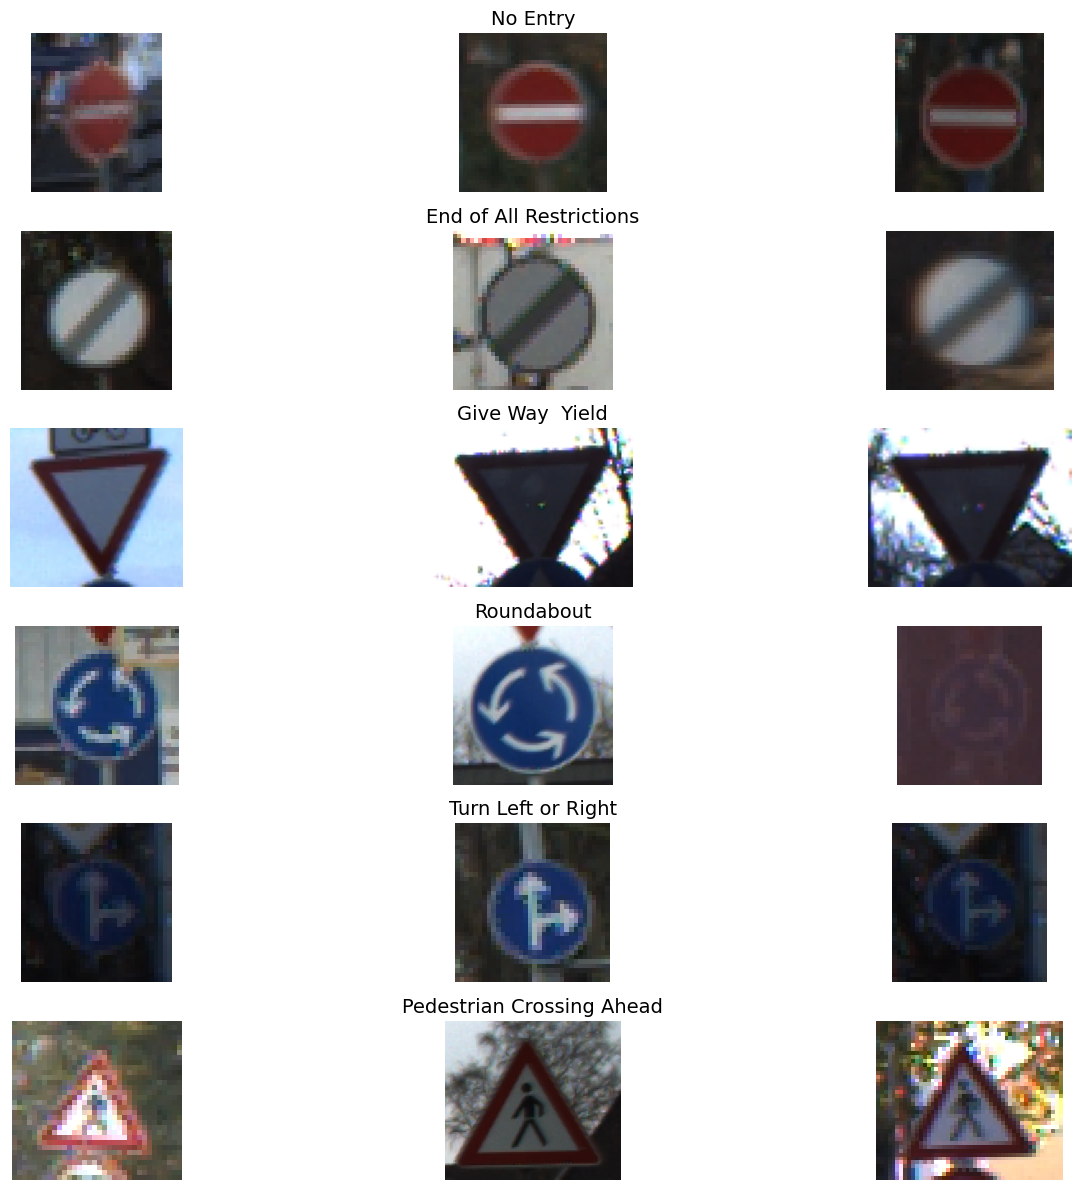

In [ ]:
import matplotlib.pyplot as plt
import random

# Choose a few classes to display
sample_classes = random.sample(train_val_ds.class_names, 6)  # 6 classes
num_samples = 3  # images per class

plt.figure(figsize=(15, 12))  # bigger figure

for i, cls in enumerate(sample_classes):
    images = list((data_dir/cls).glob('*'))
    images = random.sample(images, num_samples)  # pick 3 random images per class

    for j, img_path in enumerate(images):
        img = plt.imread(img_path)
        plt.subplot(len(sample_classes), num_samples, i*num_samples + j + 1)
        plt.imshow(img)
        plt.axis('off')
        if j == 1:
            plt.title(cls, fontsize=14)
plt.tight_layout()
plt.show()

54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step


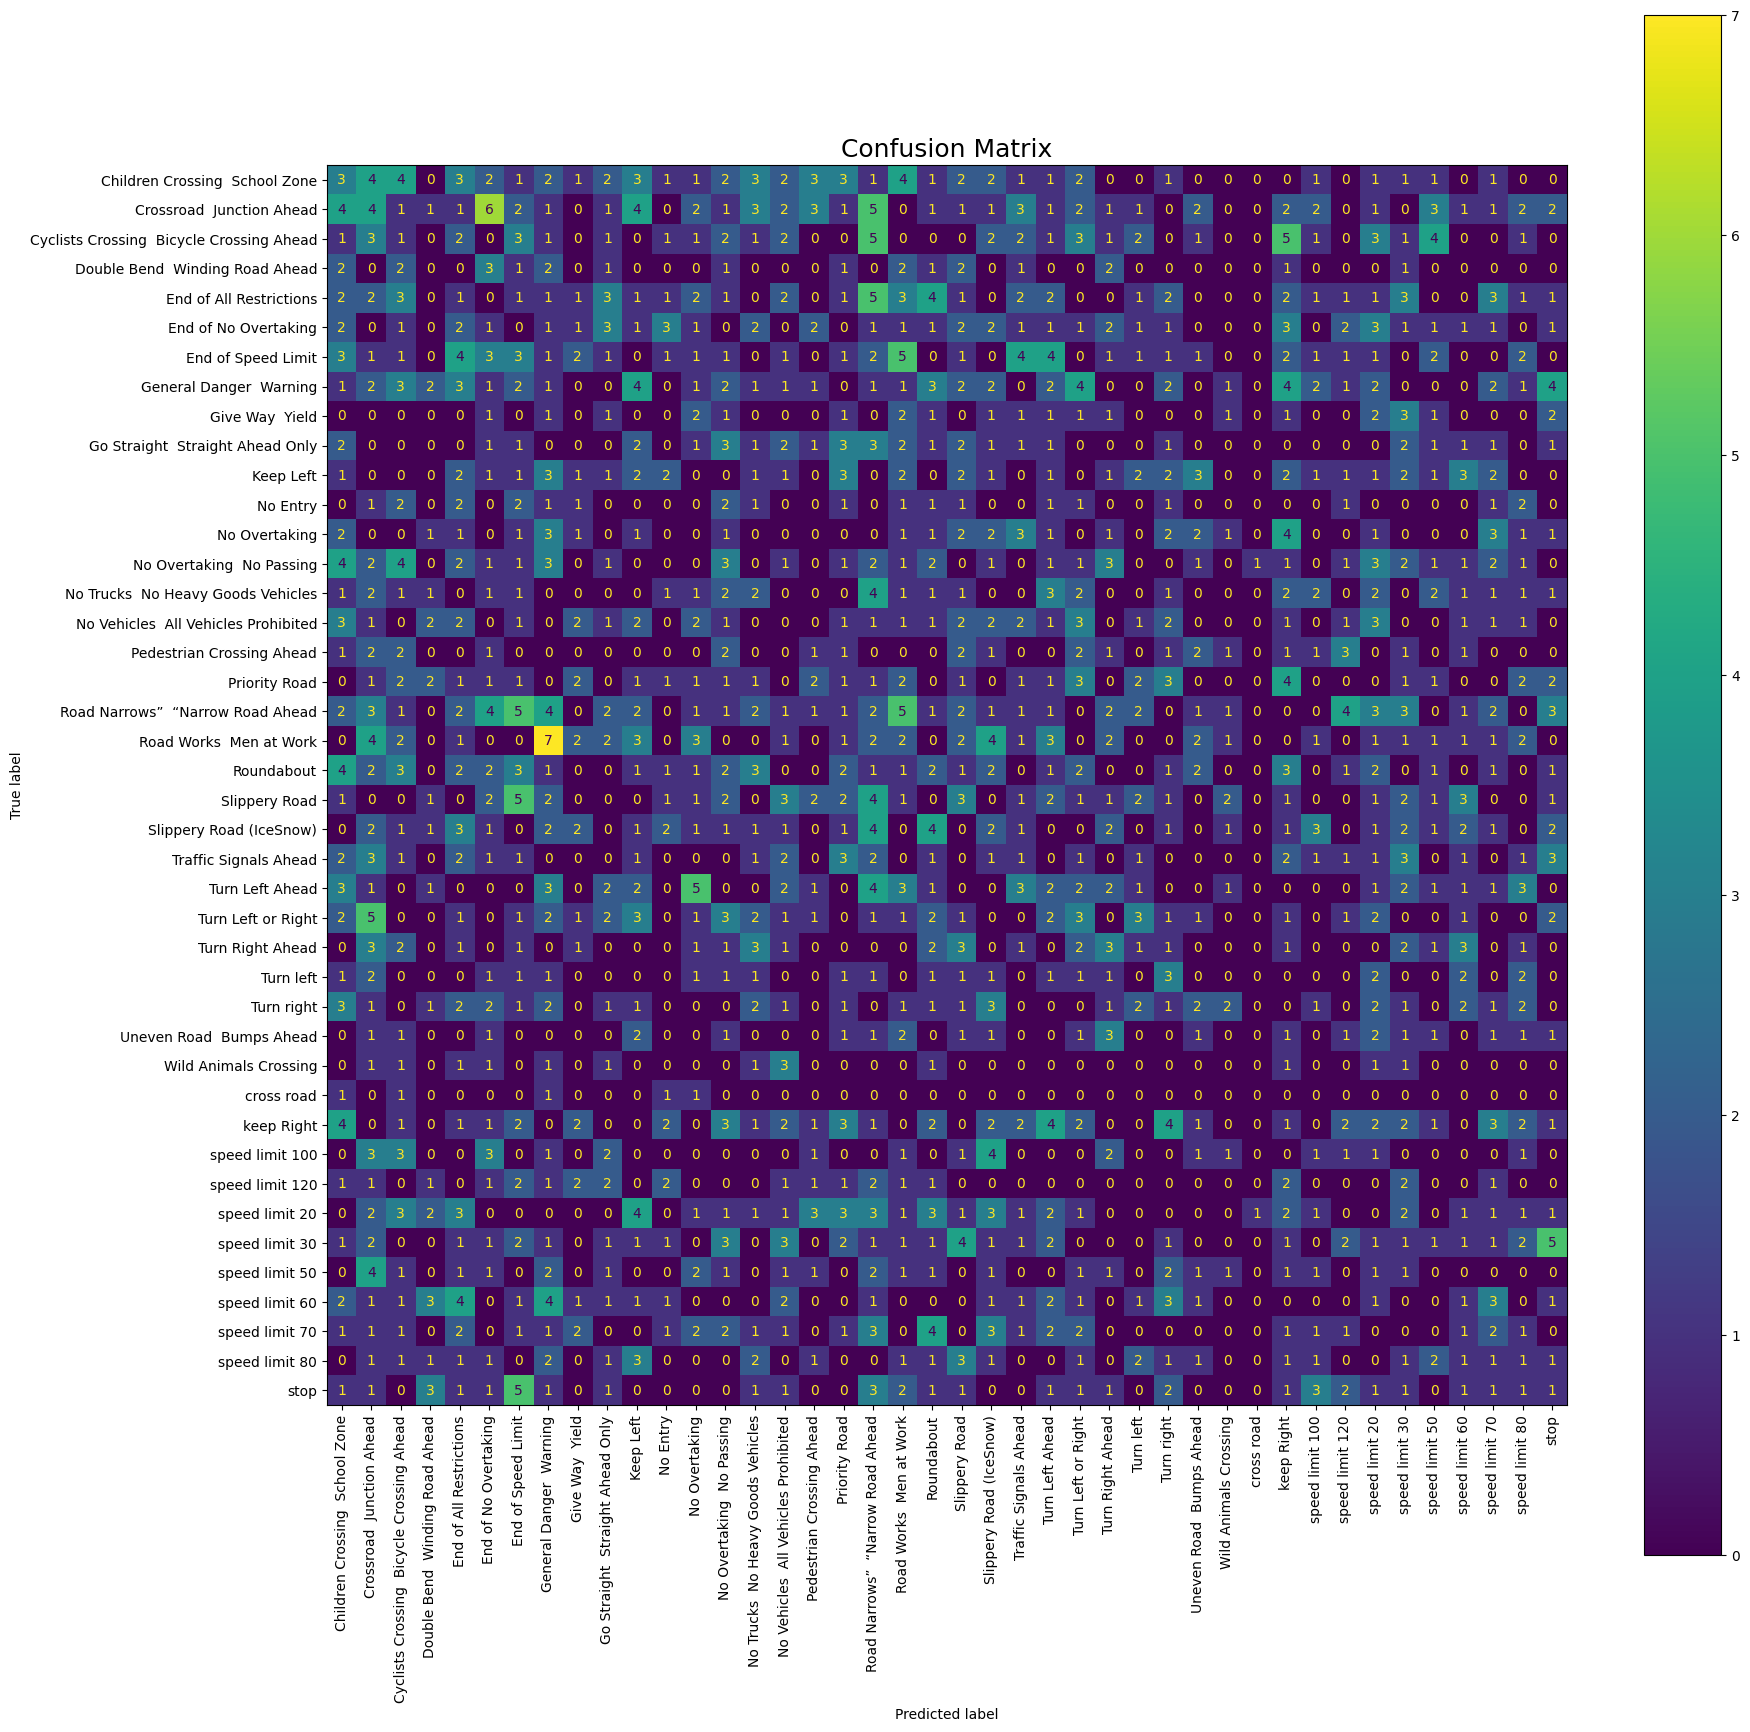

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Get true and predicted labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix in a bigger figure with larger fonts
plt.figure(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_val_ds.class_names)
disp.plot(include_values=True, xticks_rotation='vertical', values_format='d', ax=plt.gca())
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step


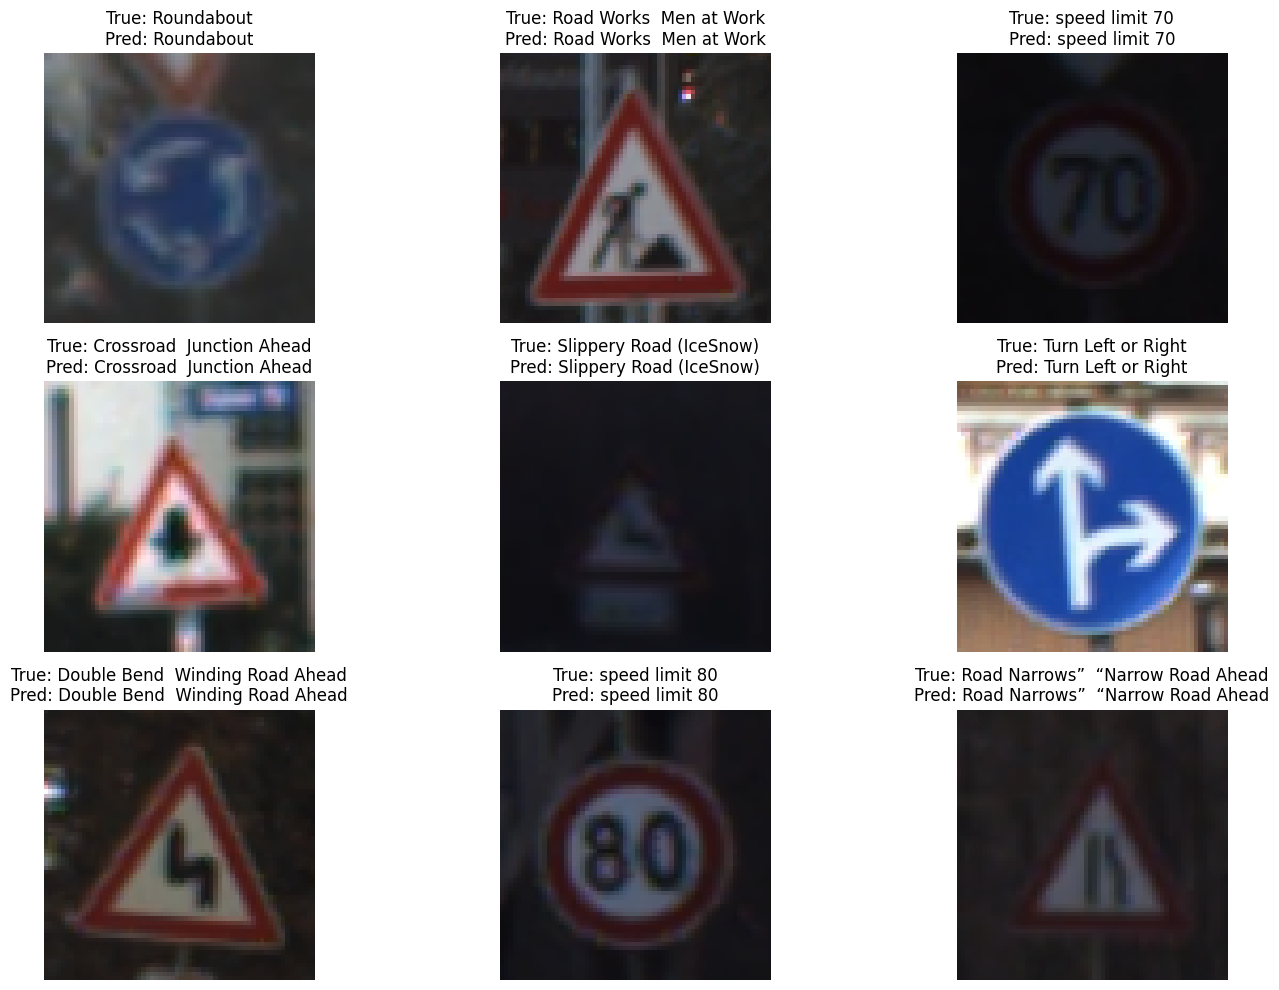

In [ ]:
#sample predictions
plt.figure(figsize=(15,10))
for images, labels in test_ds.take(1):
    preds = model.predict(images)
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy())
        plt.title(f"True: {train_val_ds.class_names[labels[i]]}\nPred: {train_val_ds.class_names[np.argmax(preds[i])]}")
        plt.axis('off')
plt.tight_layout()
plt.show()